In [31]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

In [32]:
data = pd.read_csv('../data/regional_multivariate_data.csv')
data['date'] = pd.to_datetime(data['date'])

In [46]:
def calculate_feature_importance(data, target="new_confirmed"):
    X = data.drop([target, 'region'], axis=1)
    y = data[target]
    # model = xgb.XGBRegressor(objective ='reg:squarederror')
    model = xgb.XGBRegressor()
    model.fit(X, y)

    stats = pd.DataFrame({'importance': model.feature_importances_}, index=X.columns)
    stats = stats.sort_values('importance', ascending=False)
    print(stats.iloc[:5])

    plt.figure(figsize=(28, 8))
    # plt.title(name)
    plt.xticks(rotation=45)
    plt.bar(X.columns, model.feature_importances_)
    plt.show()

East North Central
                                             importance
current_hospitalized_patients                  0.384517
cumulative_persons_fully_vaccinated_moderna    0.146271
workplace_closing                              0.097206
new_hospitalized_patients                      0.062908
new_deceased                                   0.037831


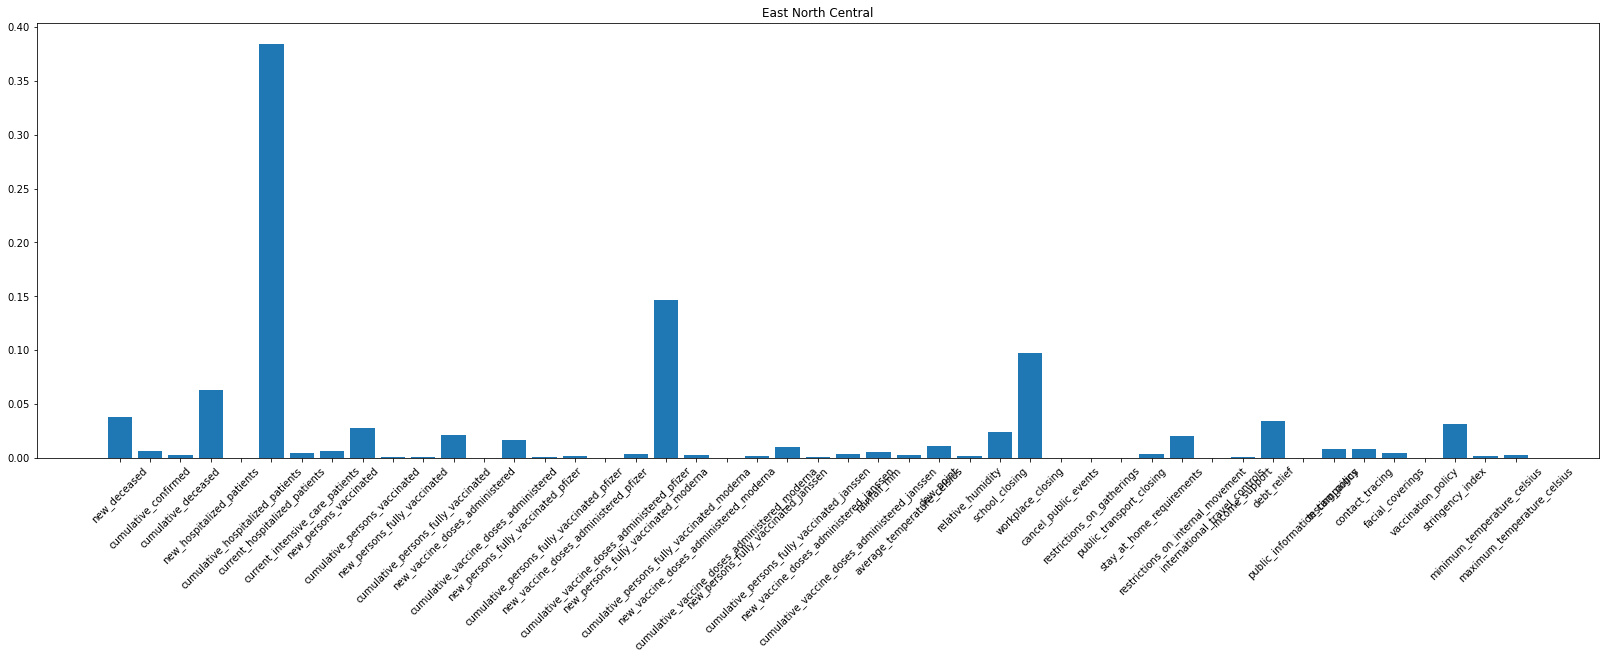




East South Central
                                       importance
current_hospitalized_patients            0.377714
cumulative_confirmed                     0.151957
cumulative_vaccine_doses_administered    0.089578
new_hospitalized_patients                0.067852
new_deceased                             0.033674


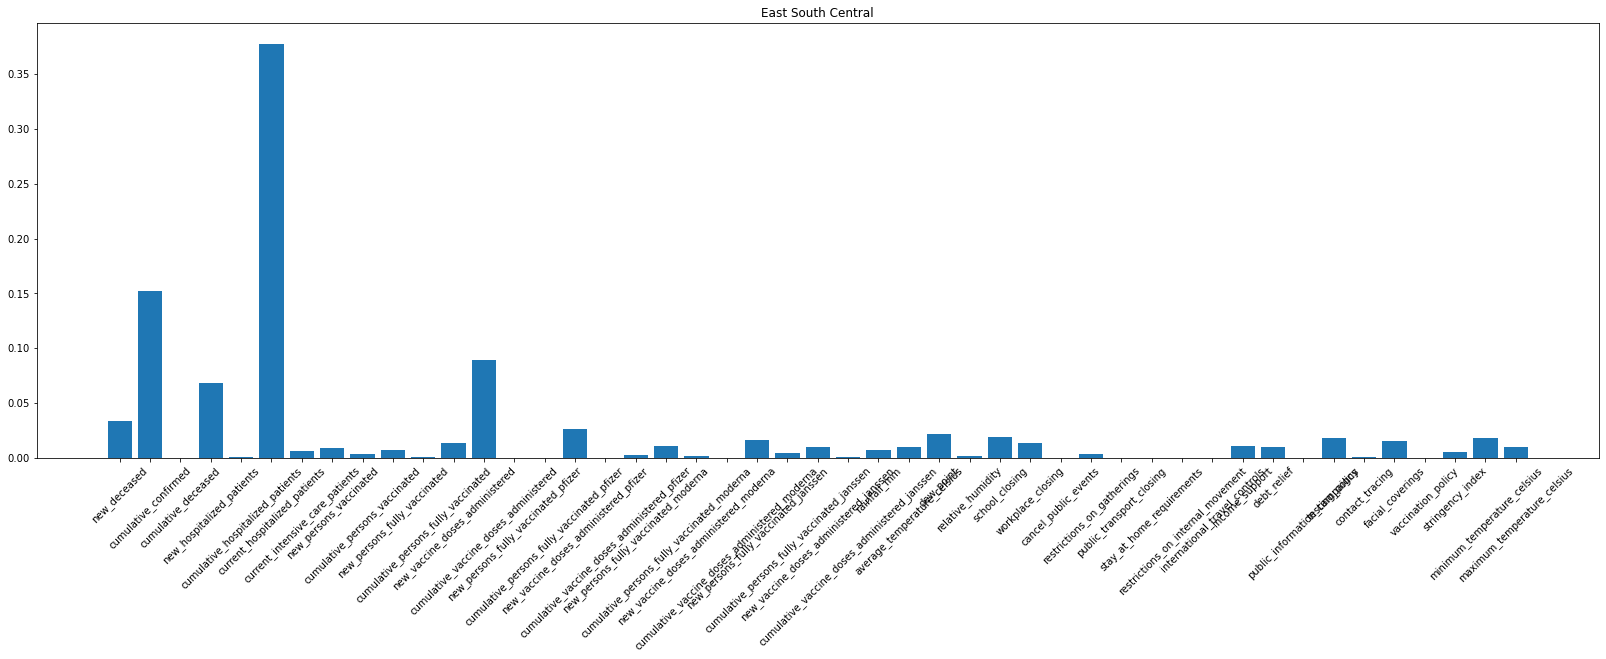




Mid-Atlantic
                               importance
stay_at_home_requirements        0.524141
new_hospitalized_patients        0.350233
workplace_closing                0.053362
cumulative_confirmed             0.019563
current_hospitalized_patients    0.012737


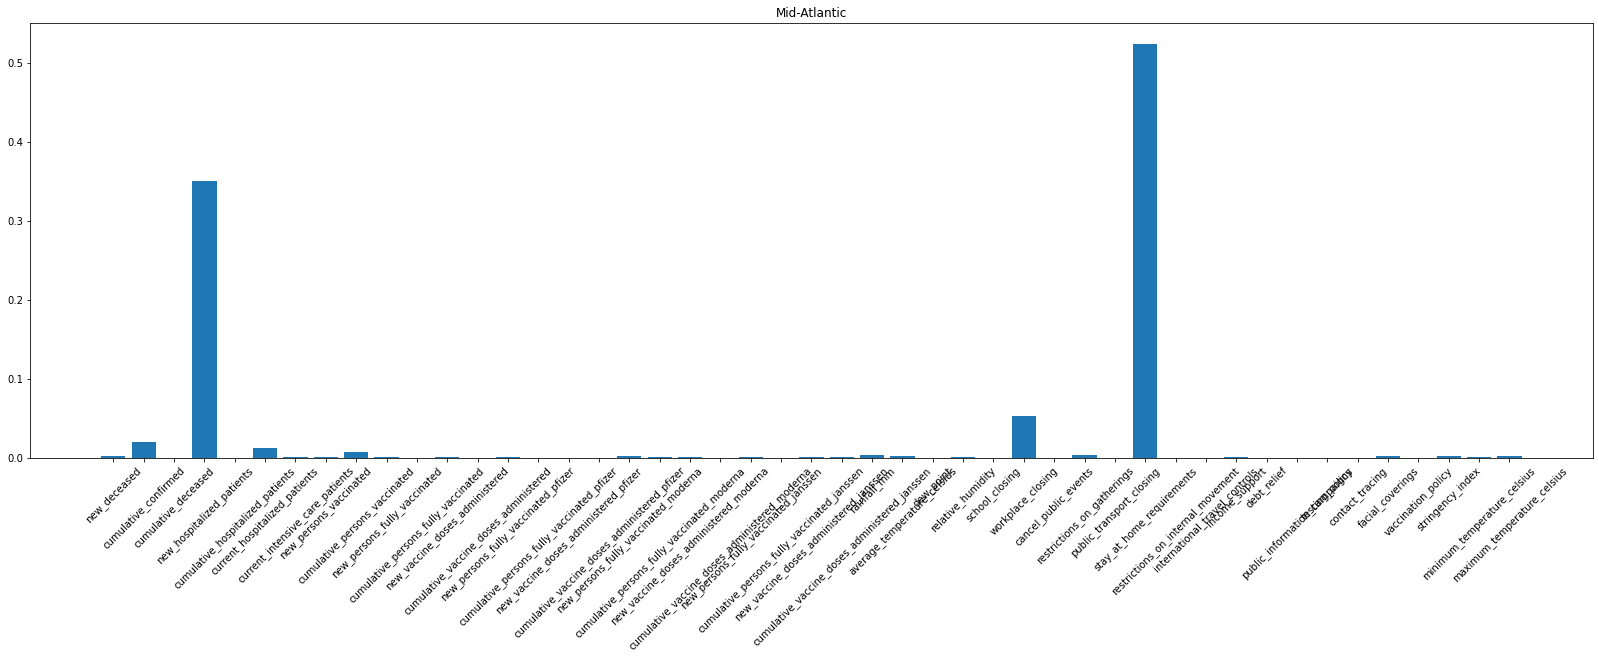




Mountain
                           importance
new_hospitalized_patients    0.352620
cancel_public_events         0.181188
cumulative_confirmed         0.151144
income_support               0.041860
stay_at_home_requirements    0.029893


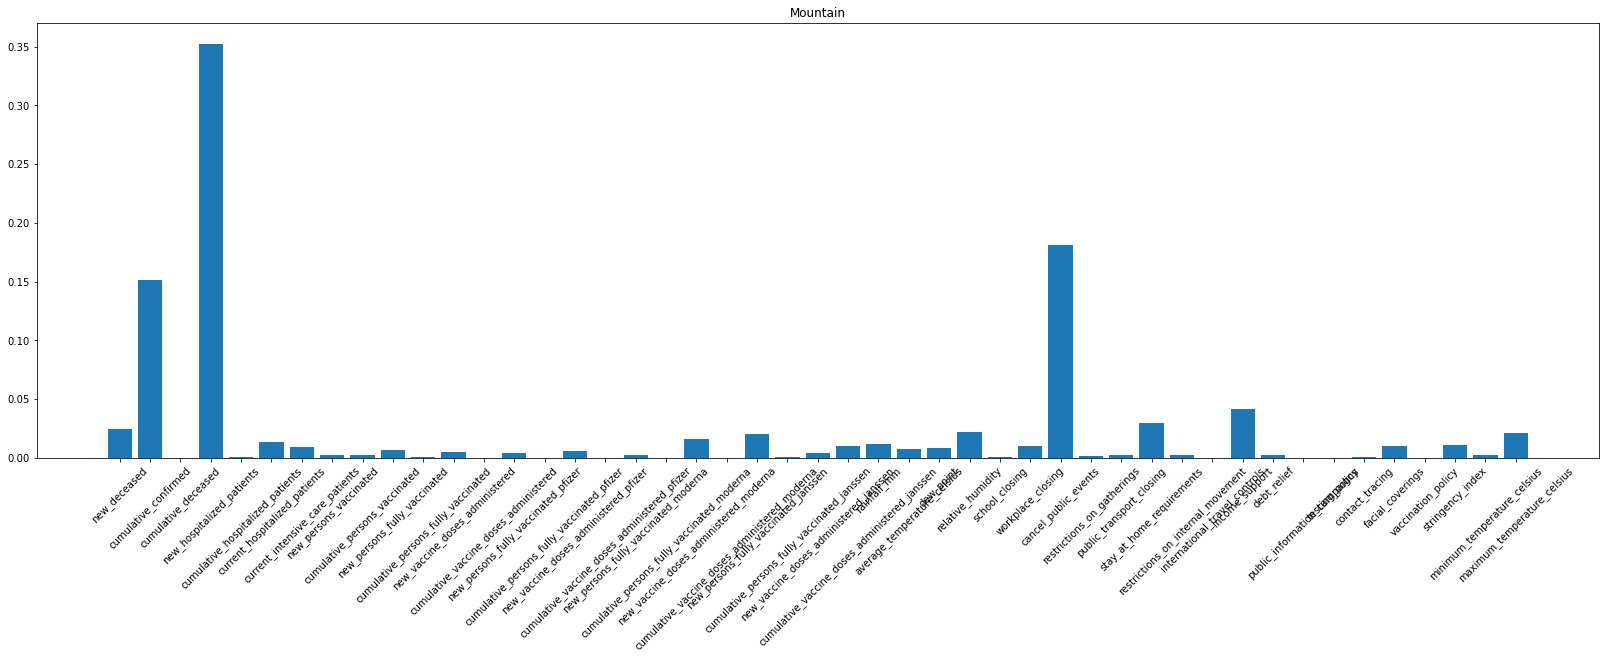




New England
                             importance
new_hospitalized_patients      0.316347
average_temperature_celsius    0.129421
school_closing                 0.107437
income_support                 0.065582
rainfall_mm                    0.053288


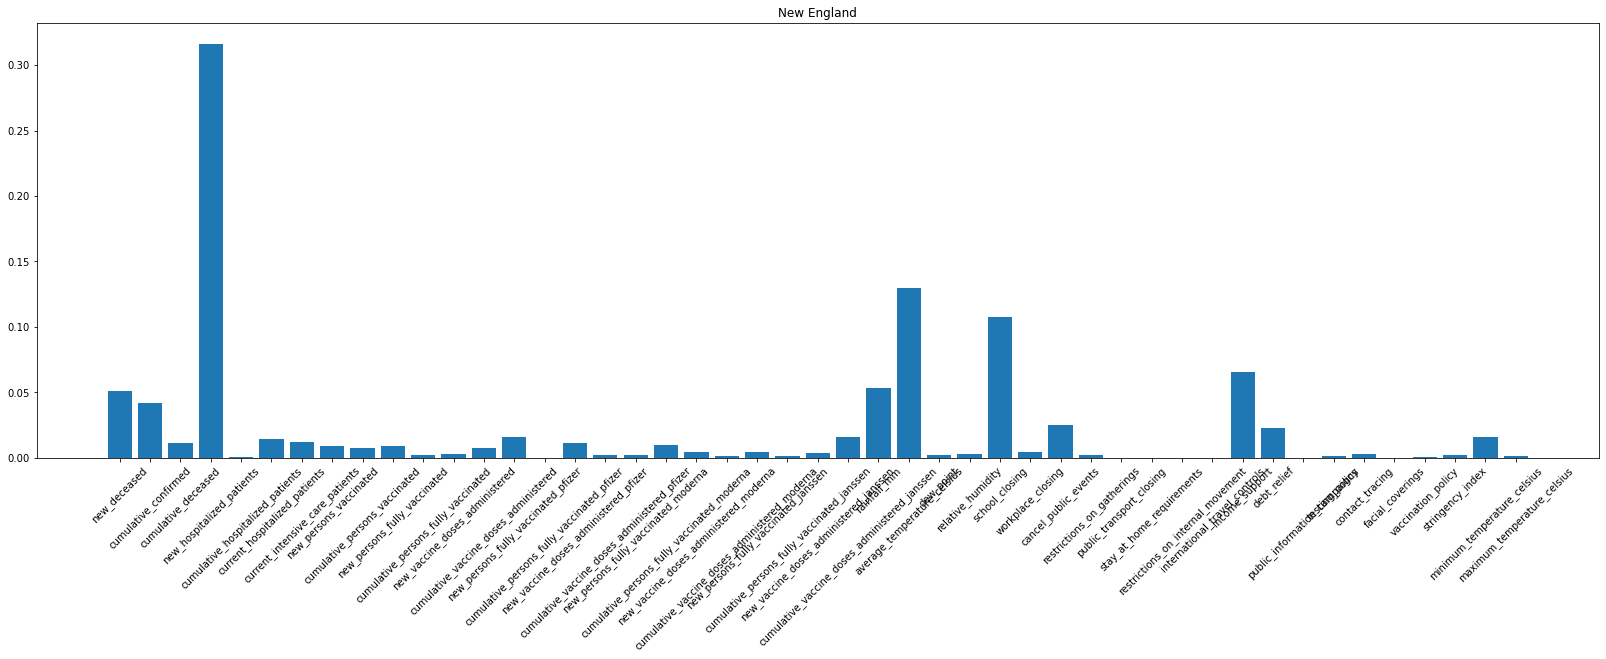




Pacific
                                        importance
public_transport_closing                  0.786340
cumulative_persons_vaccinated             0.074217
new_hospitalized_patients                 0.060022
cumulative_deceased                       0.022924
new_vaccine_doses_administered_janssen    0.010166


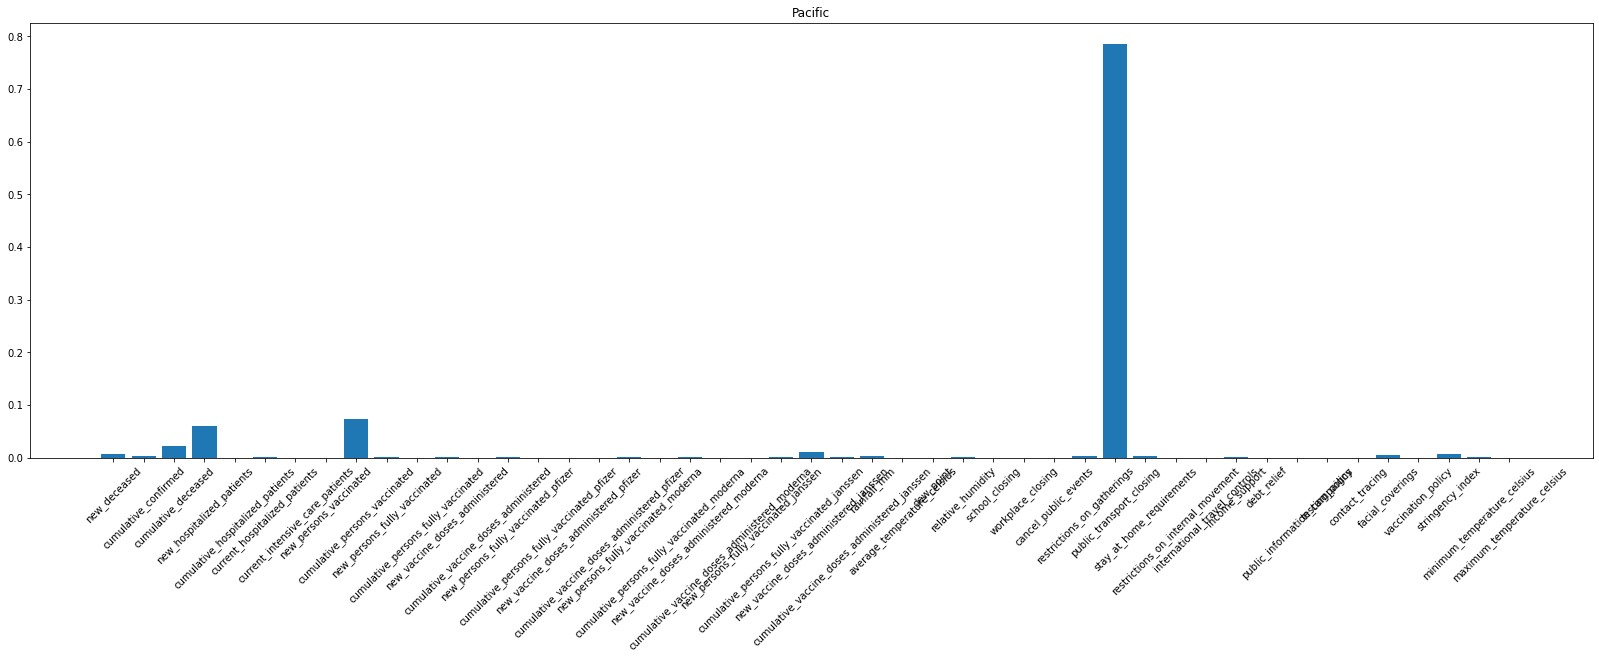




South Atlantic
                           importance
contact_tracing              0.311038
new_hospitalized_patients    0.296300
stay_at_home_requirements    0.142824
cumulative_deceased          0.038917
new_deceased                 0.031224


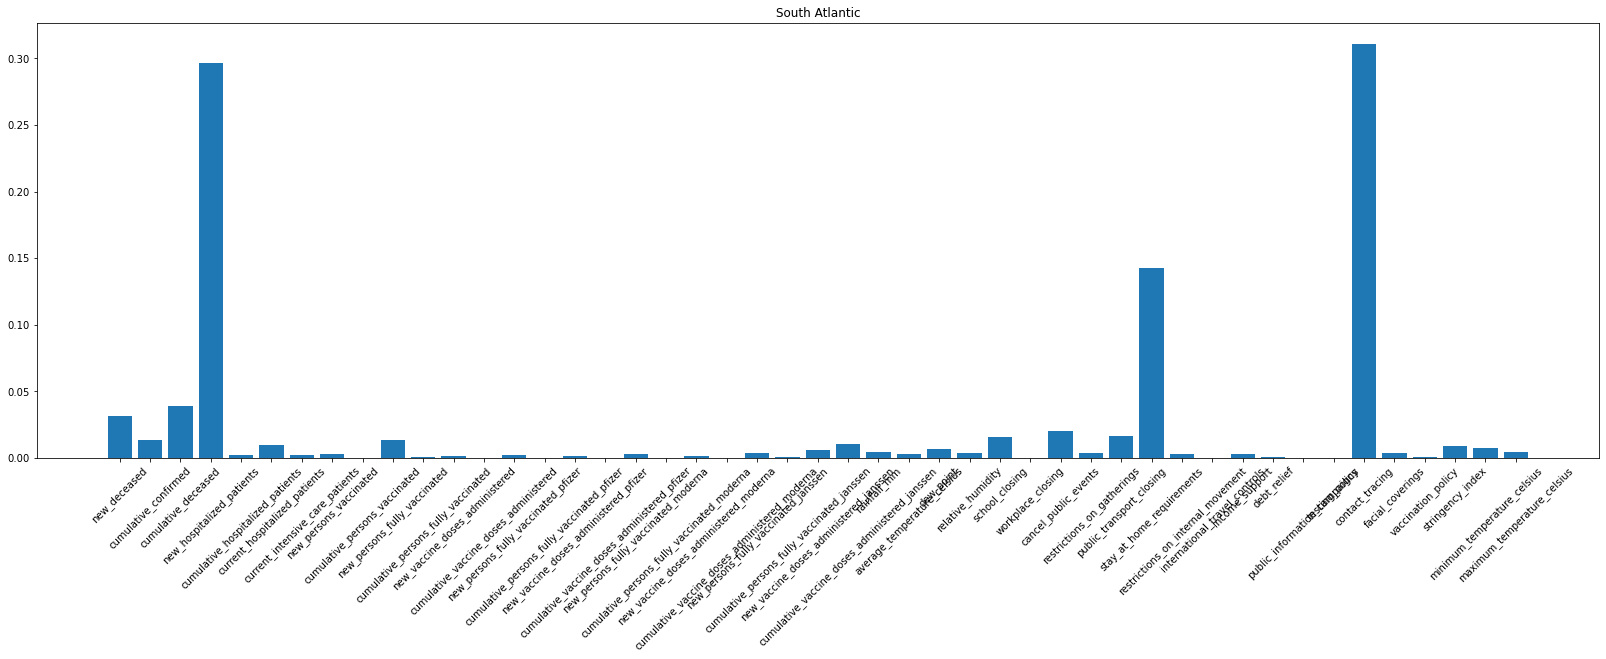




West North Central
                                        importance
current_hospitalized_patients             0.279046
new_vaccine_doses_administered_moderna    0.133428
new_hospitalized_patients                 0.113979
workplace_closing                         0.085997
income_support                            0.066112


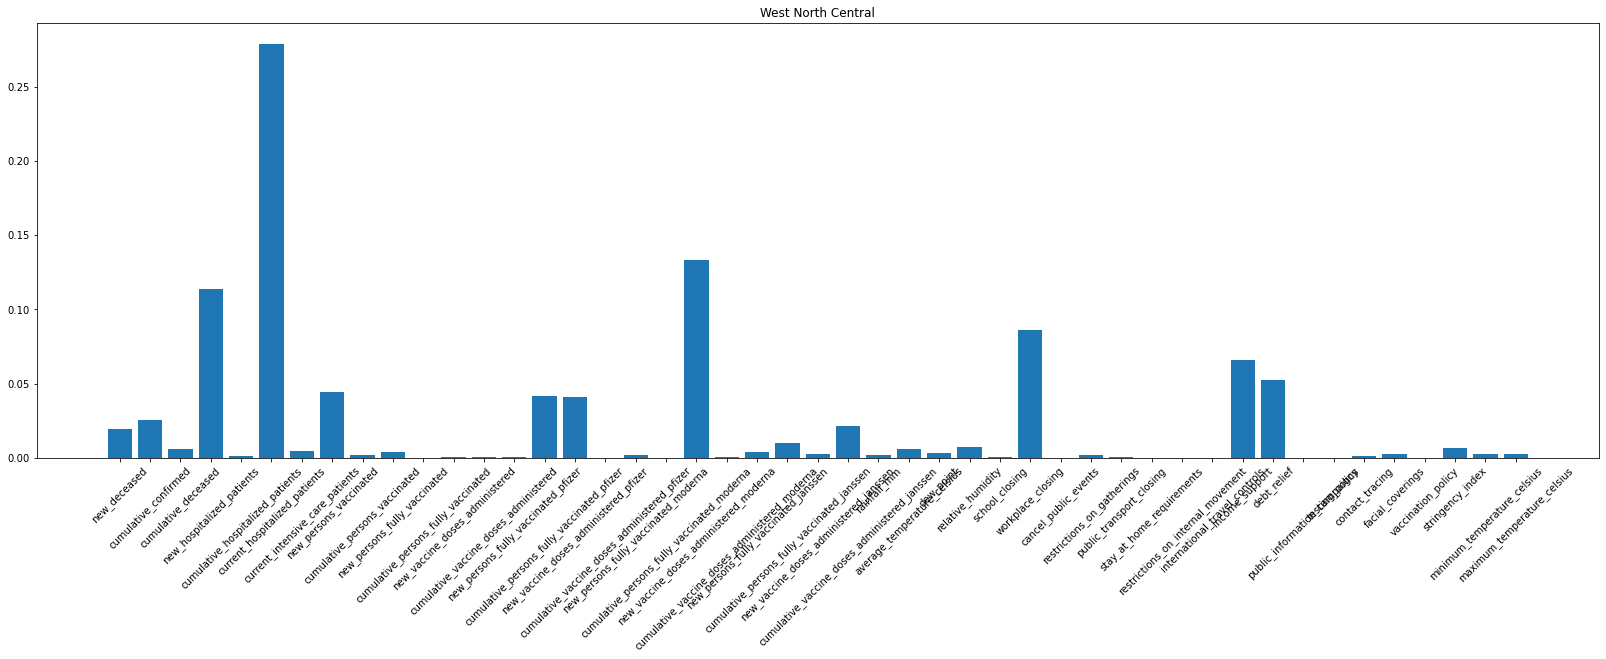




West South Central
                                               importance
new_hospitalized_patients                        0.464286
cumulative_confirmed                             0.291322
current_intensive_care_patients                  0.020524
cumulative_vaccine_doses_administered_janssen    0.018880
relative_humidity                                0.018695


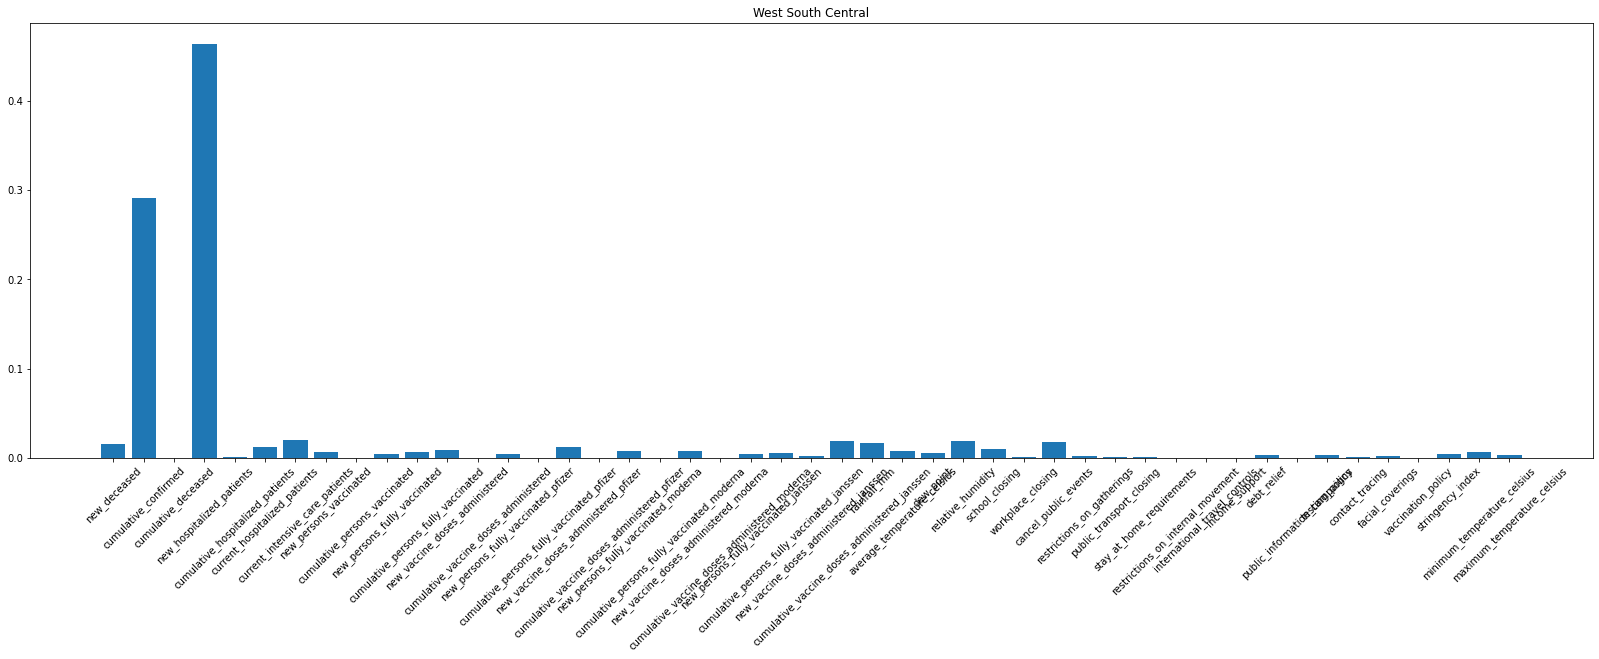

In [39]:
# split data into train and test sets
groups = data.groupby('region')
target = "new_confirmed"
for name, group in groups:
    print(name)
    # split data into X and y
    group = group.set_index('date')
    X = group.drop([target, 'region'], axis=1)
    y = group[target]
    # model = xgb.XGBRegressor(objective ='reg:squarederror')
    model = xgb.XGBRegressor()
    model.fit(X, y)

    stats = pd.DataFrame({'importance': model.feature_importances_}, index=X.columns)
    stats = stats.sort_values('importance', ascending=False)
    print(stats.iloc[:5])

    plt.figure(figsize=(28, 8))
    plt.title(name)
    plt.xticks(rotation=45)
    plt.bar(X.columns, model.feature_importances_)
    plt.show()

    print('\n\n')

East North Central


/Users/benmagevney/miniconda/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


                                      importance
new_hospitalized_patients               0.521556
cumulative_persons_vaccinated           0.349303
cumulative_confirmed                    0.054645
new_persons_fully_vaccinated_janssen    0.011019
new_persons_fully_vaccinated_moderna    0.009378


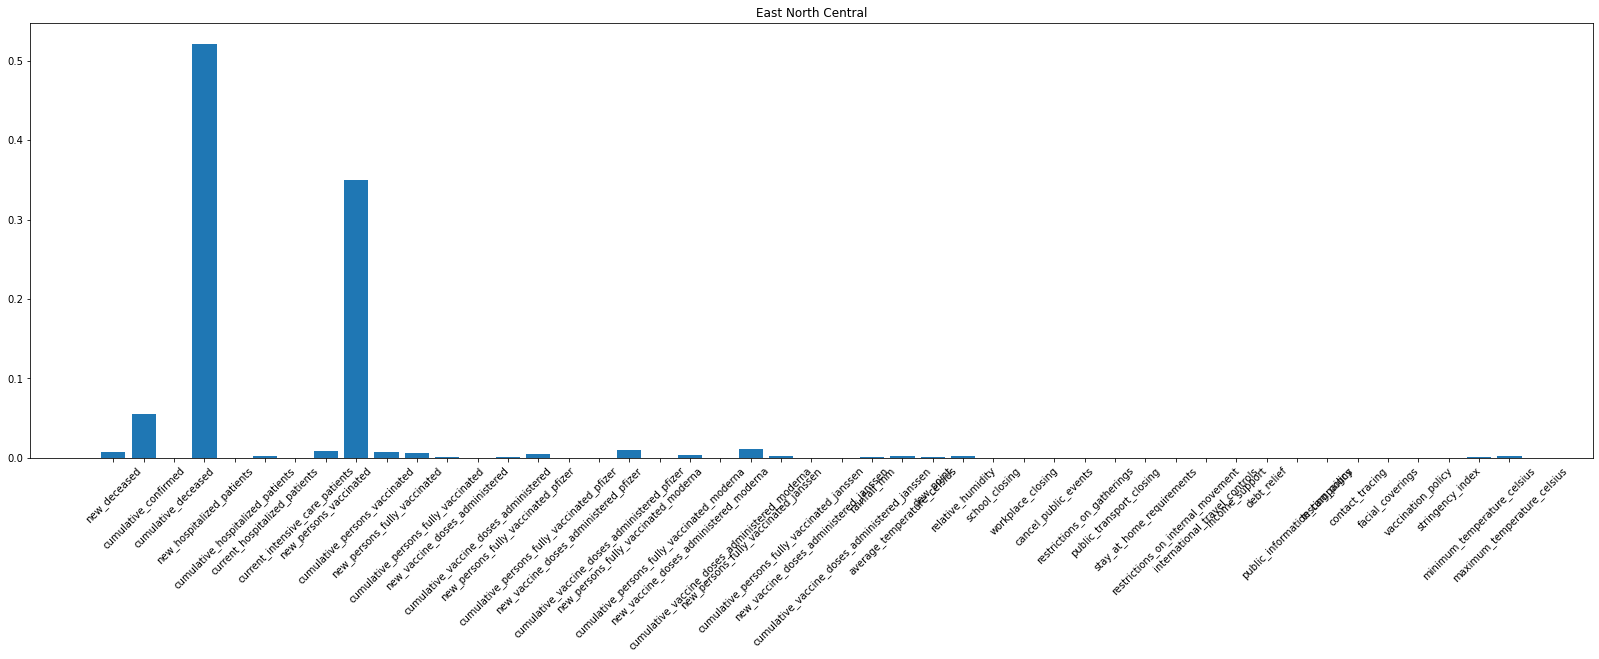




East South Central


/Users/benmagevney/miniconda/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


                                        importance
cumulative_vaccine_doses_administered     0.629367
new_hospitalized_patients                 0.158942
cumulative_persons_fully_vaccinated       0.122420
cumulative_confirmed                      0.037467
new_vaccine_doses_administered_moderna    0.018005


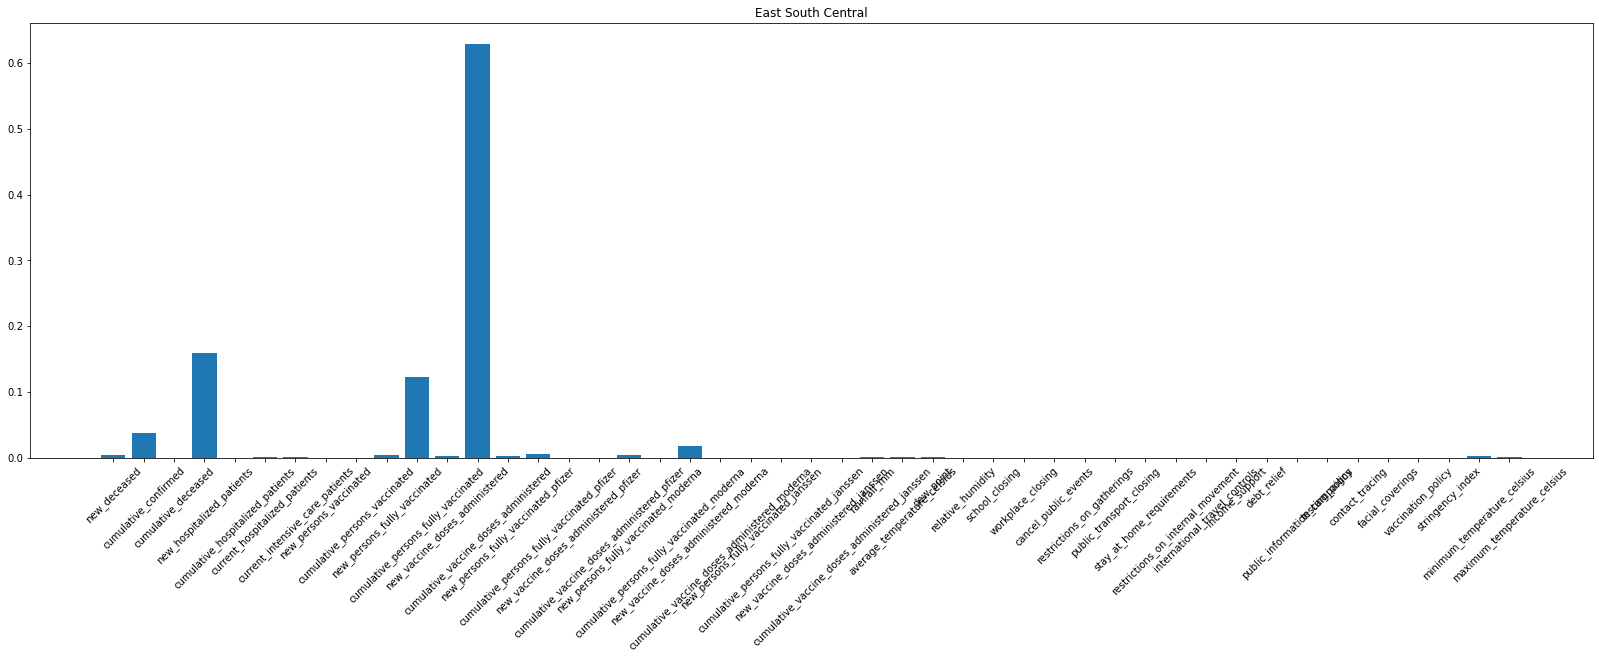




Mid-Atlantic


/Users/benmagevney/miniconda/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


                                             importance
new_hospitalized_patients                      0.501195
cumulative_persons_vaccinated                  0.298588
cumulative_confirmed                           0.084465
cumulative_persons_fully_vaccinated_janssen    0.059213
new_persons_fully_vaccinated_janssen           0.011713


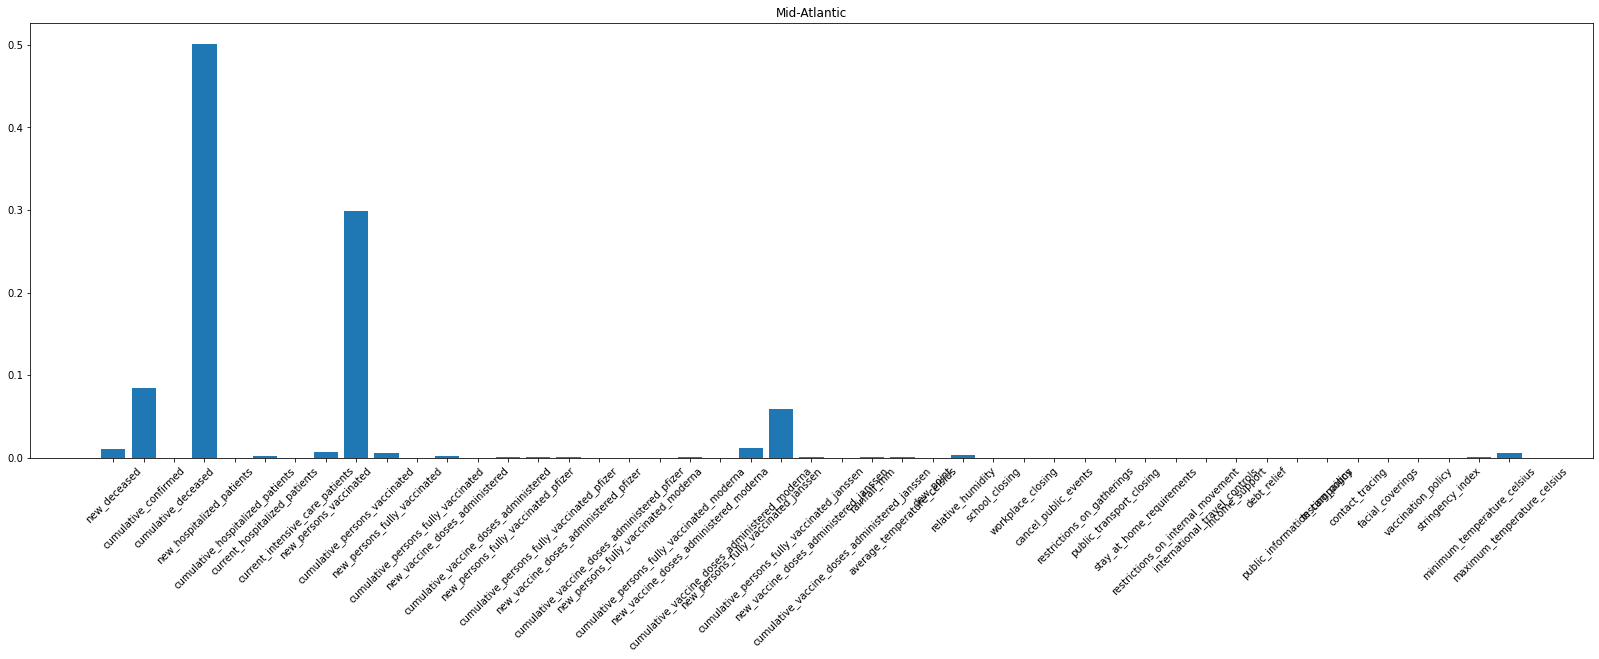




Mountain


/Users/benmagevney/miniconda/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


                                            importance
cumulative_persons_vaccinated                 0.499167
new_hospitalized_patients                     0.294200
cumulative_persons_fully_vaccinated_pfizer    0.133099
cumulative_persons_fully_vaccinated           0.045388
cumulative_confirmed                          0.016396


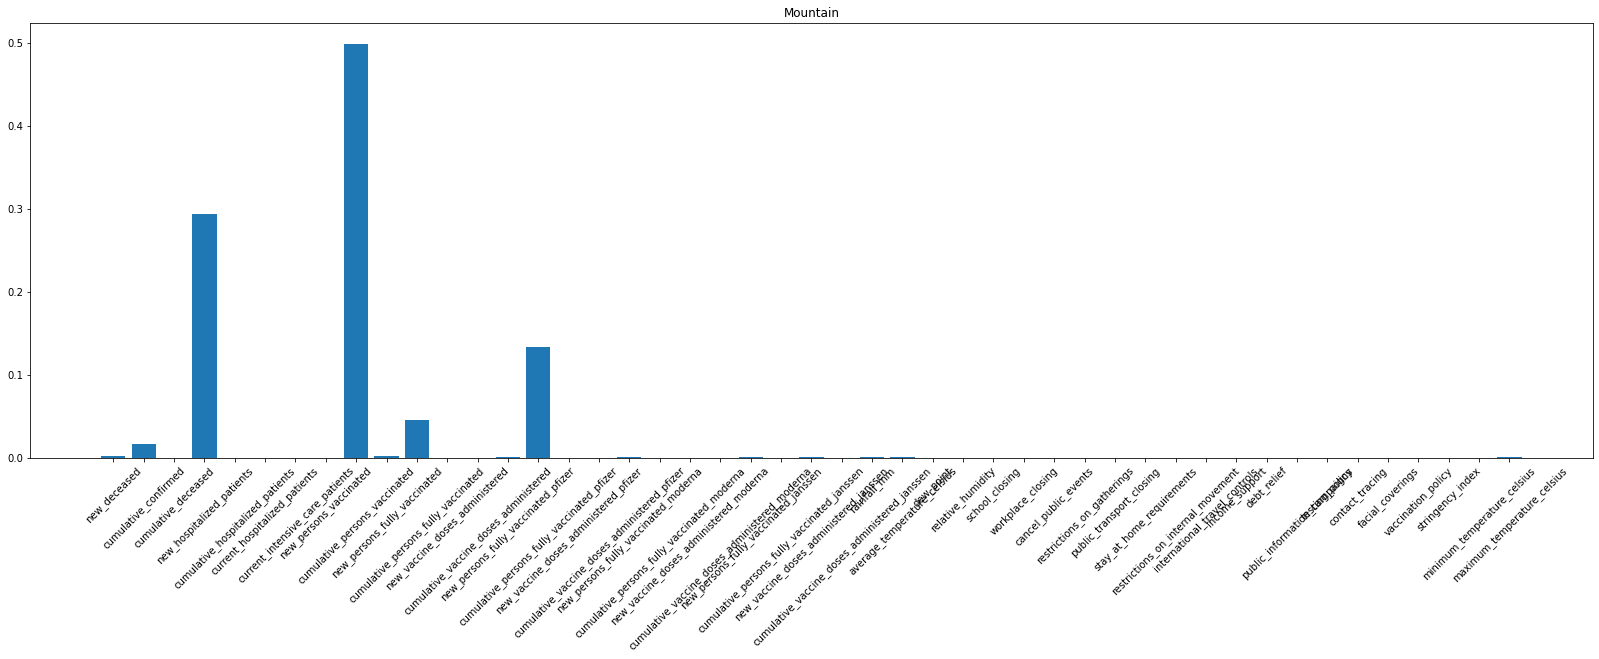




New England


/Users/benmagevney/miniconda/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


                                              importance
cumulative_vaccine_doses_administered_pfizer    0.301423
stringency_index                                0.259080
cumulative_confirmed                            0.158443
cumulative_persons_vaccinated                   0.105916
new_hospitalized_patients                       0.060354


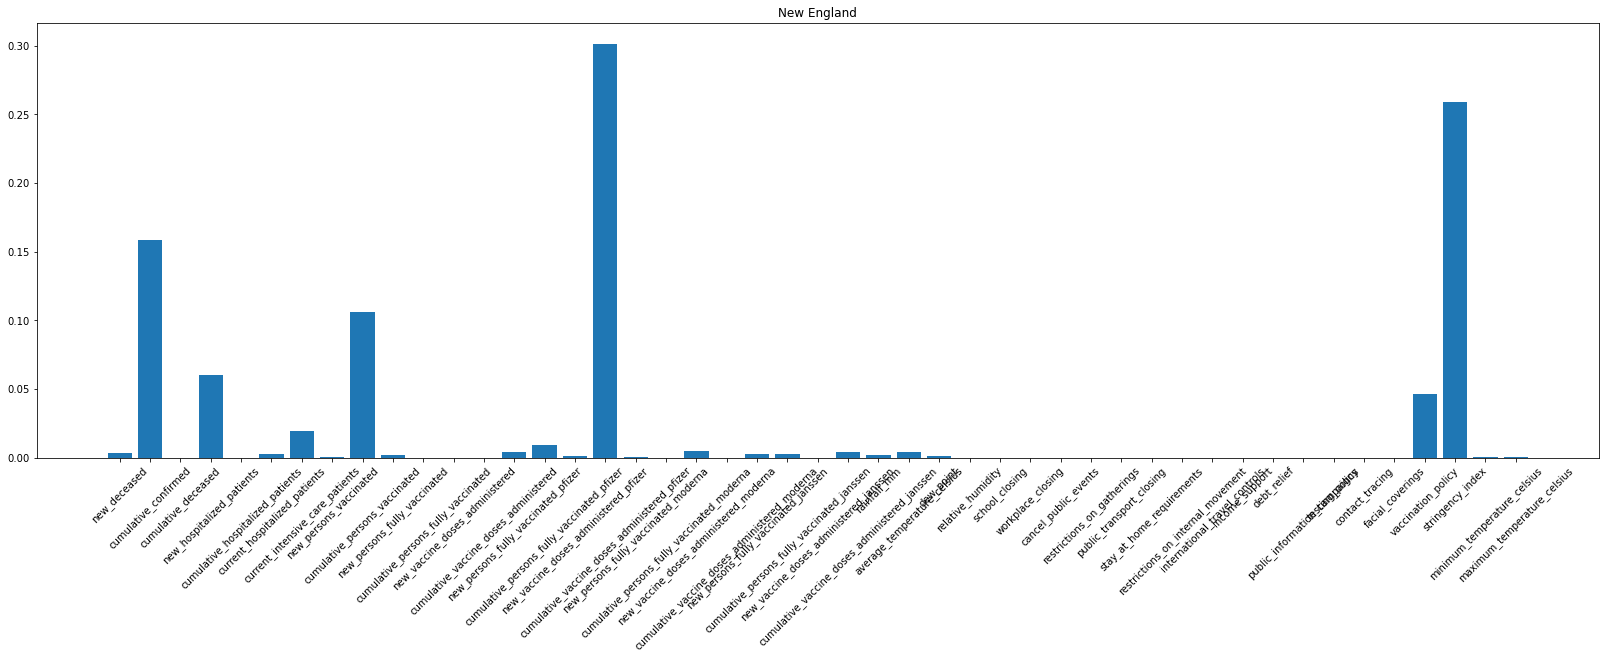




Pacific


/Users/benmagevney/miniconda/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


                                importance
new_hospitalized_patients         0.448093
contact_tracing                   0.200261
cumulative_confirmed              0.118866
new_vaccine_doses_administered    0.036357
dew_point                         0.026099


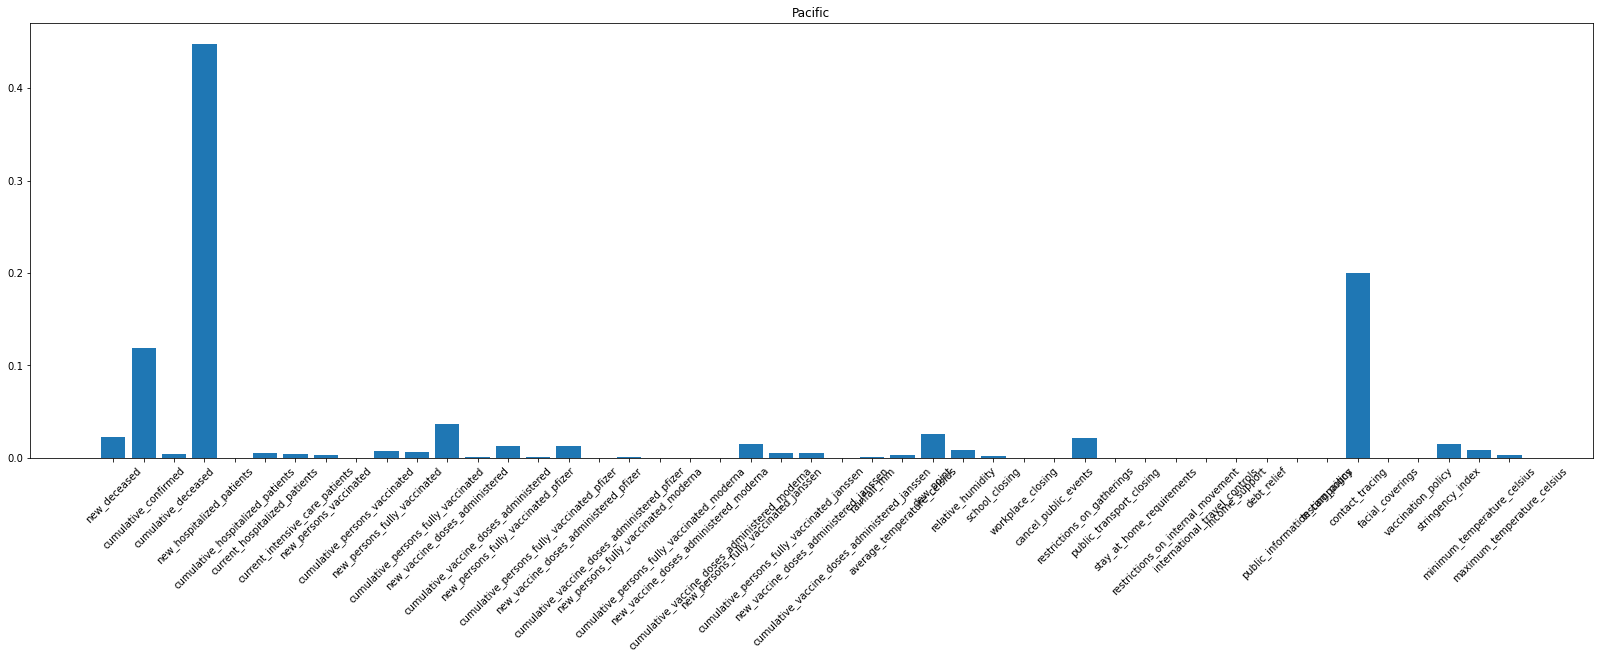




South Atlantic


/Users/benmagevney/miniconda/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


                              importance
new_hospitalized_patients       0.568712
cumulative_confirmed            0.385497
new_deceased                    0.006513
school_closing                  0.004649
new_persons_fully_vaccinated    0.004332


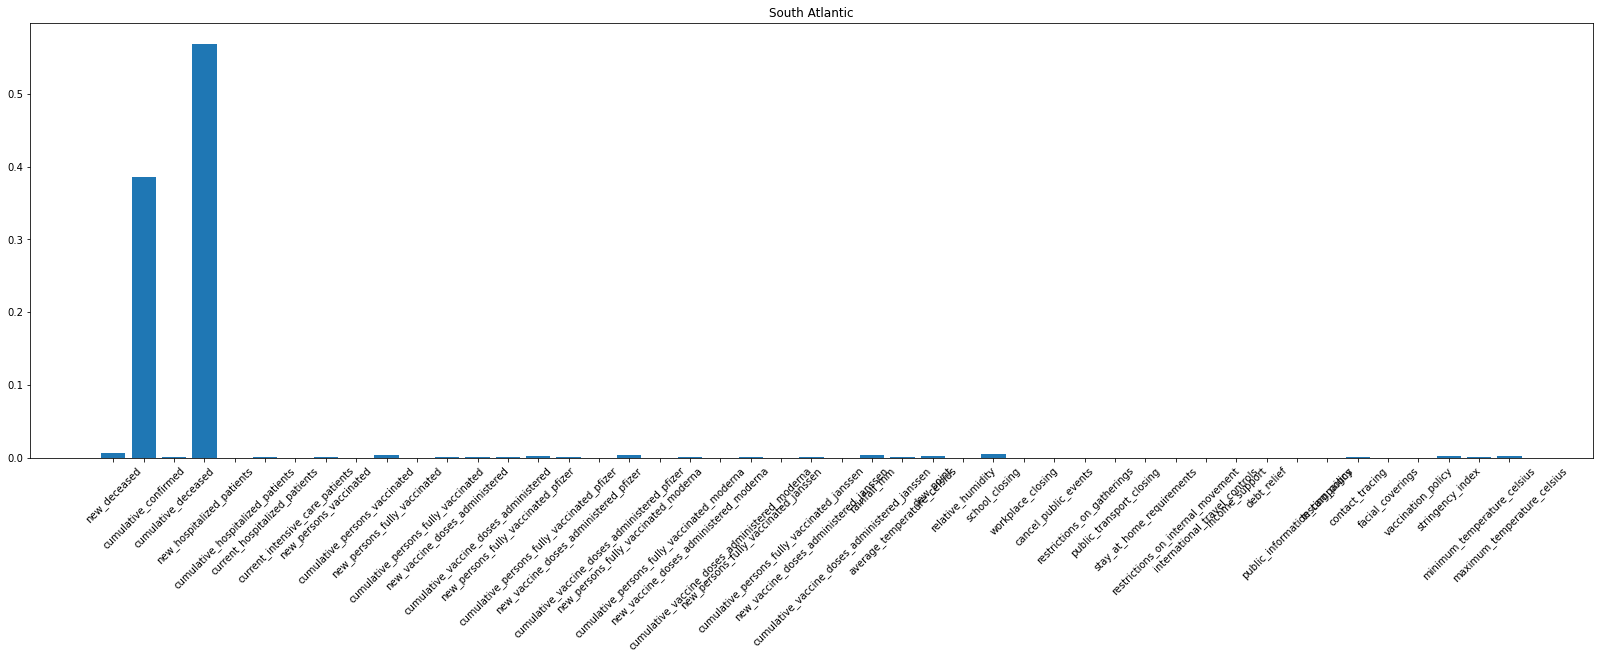




West North Central


/Users/benmagevney/miniconda/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


                           importance
contact_tracing              0.477028
new_hospitalized_patients    0.314620
cumulative_confirmed         0.047007
income_support               0.036148
relative_humidity            0.030816


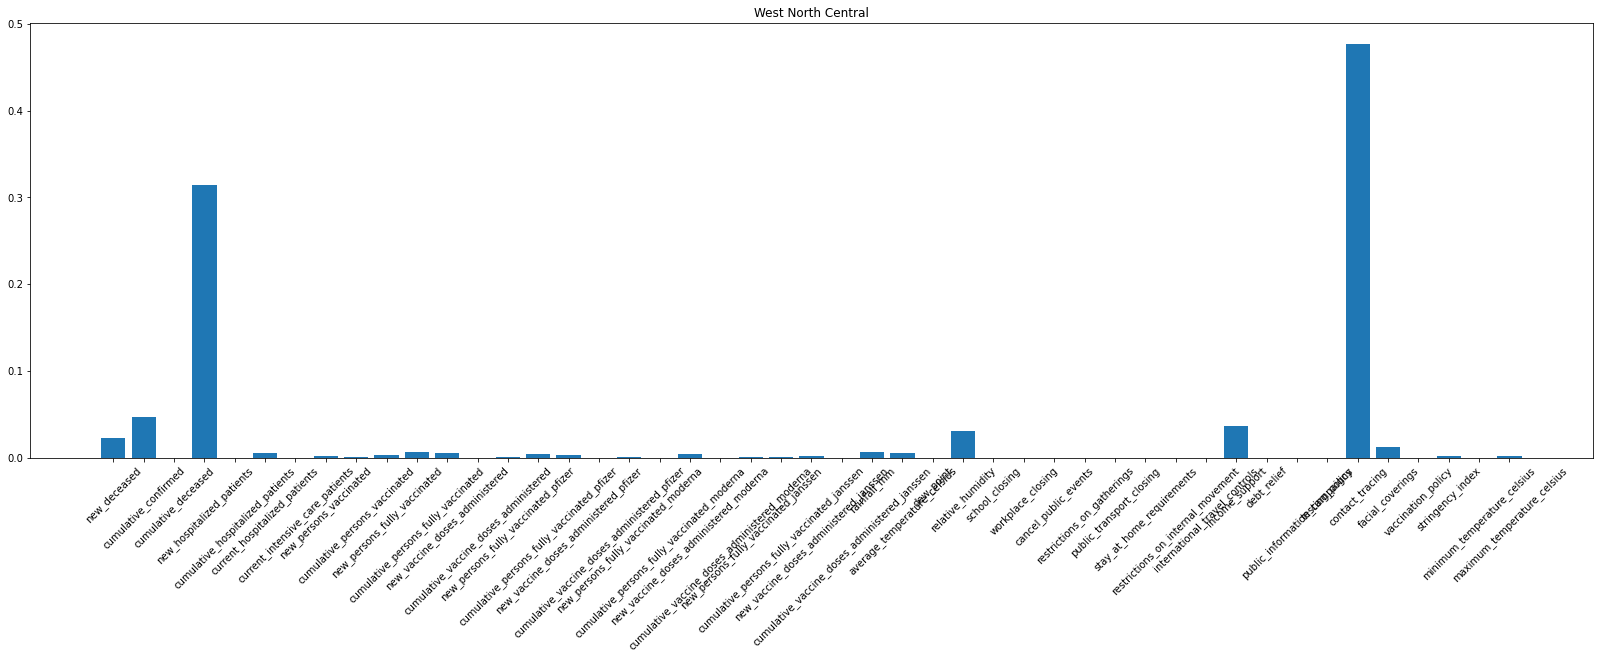




West South Central


/Users/benmagevney/miniconda/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


                                 importance
new_hospitalized_patients          0.714090
relative_humidity                  0.129717
current_intensive_care_patients    0.038959
cumulative_confirmed               0.022739
current_hospitalized_patients      0.014698


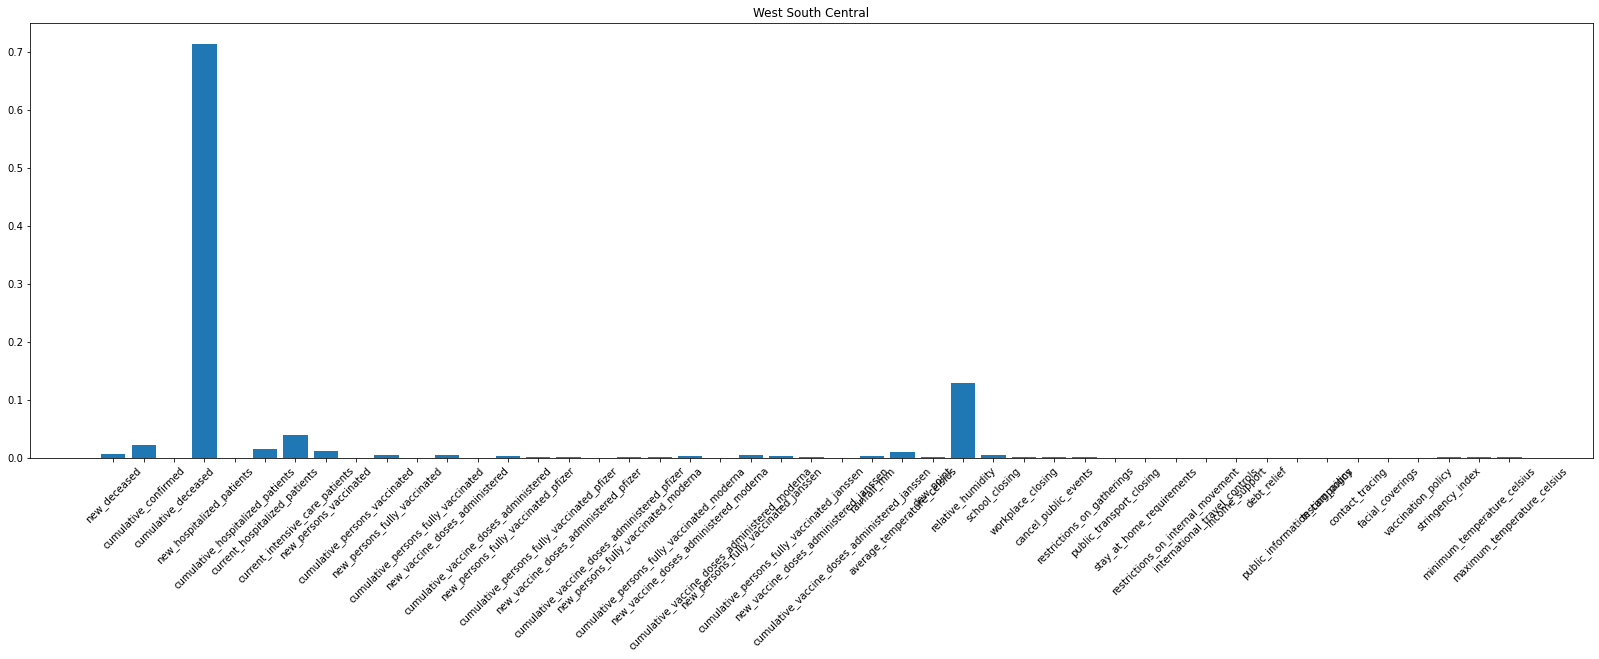

In [40]:
# split data into train and test sets
groups = data.groupby('region')
target = "new_confirmed"
for name, group in groups:
    print(name)
    # split data into X and y
    group = group.set_index('date')
    X = group.drop([target, 'region'], axis=1)
    X = X.replace(0, np.nan)
    X = X.dropna()  # or use another method to fill nan values
    X = np.log(X)
    y = group.loc[X.index, target]
    # model = xgb.XGBRegressor(objective ='reg:squarederror')
    model = xgb.XGBRegressor()
    model.fit(X, y)

    stats = pd.DataFrame({'importance': model.feature_importances_}, index=X.columns)
    stats = stats.sort_values('importance', ascending=False)
    print(stats.iloc[:5])

    plt.figure(figsize=(28, 8))
    plt.title(name)
    plt.xticks(rotation=45)
    plt.bar(X.columns, model.feature_importances_)
    plt.show()

    print('\n\n')

## check out lag terms 

In [44]:
enc = pd.read_csv('../data/regional_datasets/enc_data.csv')
esc = pd.read_csv('../data/regional_datasets/esc_data.csv')
mid_atlantic = pd.read_csv('../data/regional_datasets/mid_atlantic_data.csv')
mountain = pd.read_csv('../data/regional_datasets/mountain_data.csv')
new_england = pd.read_csv('../data/regional_datasets/new_england_data.csv')
pacific = pd.read_csv('../data/regional_datasets/pacific_data.csv')
south_atlantic = pd.read_csv('../data/regional_datasets/south_atlantic_data.csv')
wnc = pd.read_csv('../data/regional_datasets/wnc_data.csv')
wsc = pd.read_csv('../data/regional_datasets/wsc_data.csv')
datasets = [enc, esc, mid_atlantic, mountain, new_england, pacific, south_atlantic, wnc, wsc]
for df in datasets:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

                                 importance
7_day_shift                        0.654887
current_intensive_care_patients    0.072584
school_closing                     0.031775
contact_tracing                    0.028264
current_hospitalized_patients      0.024152


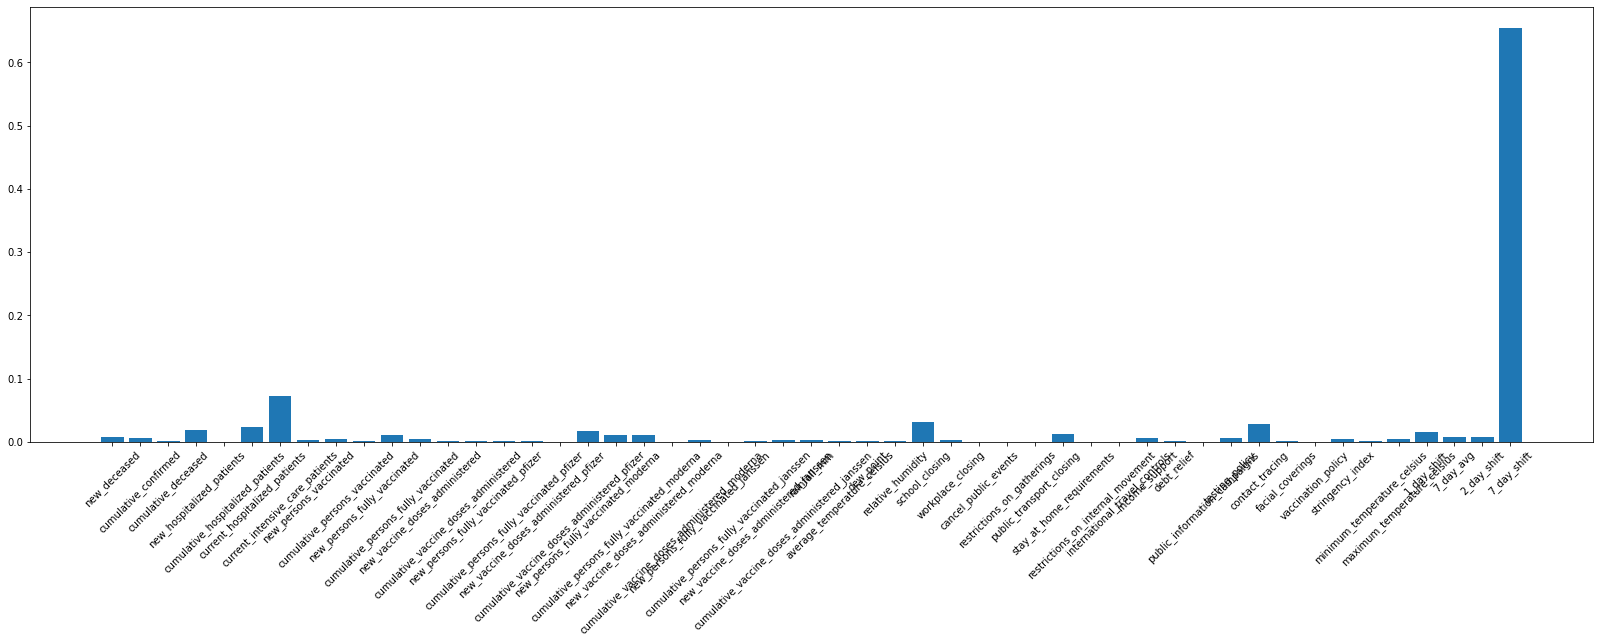

                      importance
7_day_avg               0.596956
7_day_shift             0.139206
cancel_public_events    0.044987
school_closing          0.030782
new_deceased            0.024986


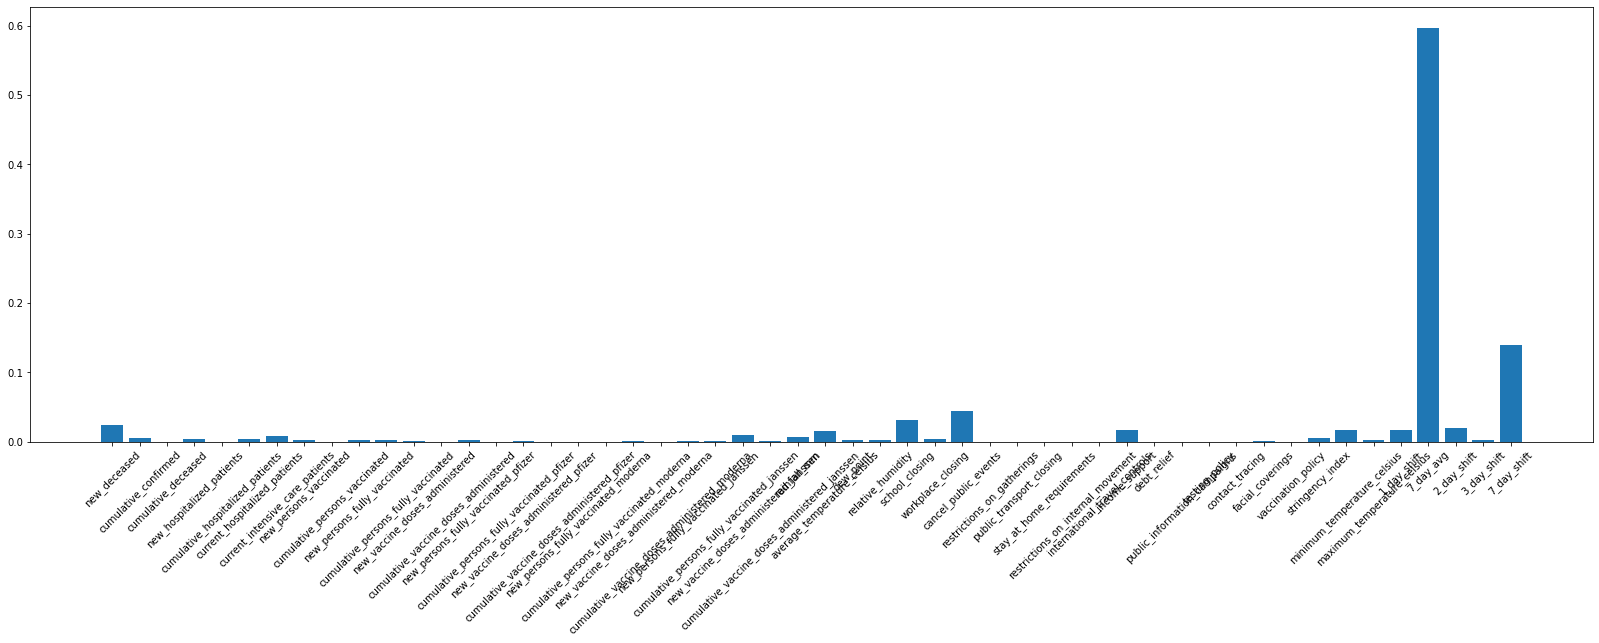

                               importance
7_day_avg                        0.837090
2_day_shift                      0.077875
1_day_shift                      0.042509
cumulative_confirmed             0.016230
cumulative_persons_vaccinated    0.006906


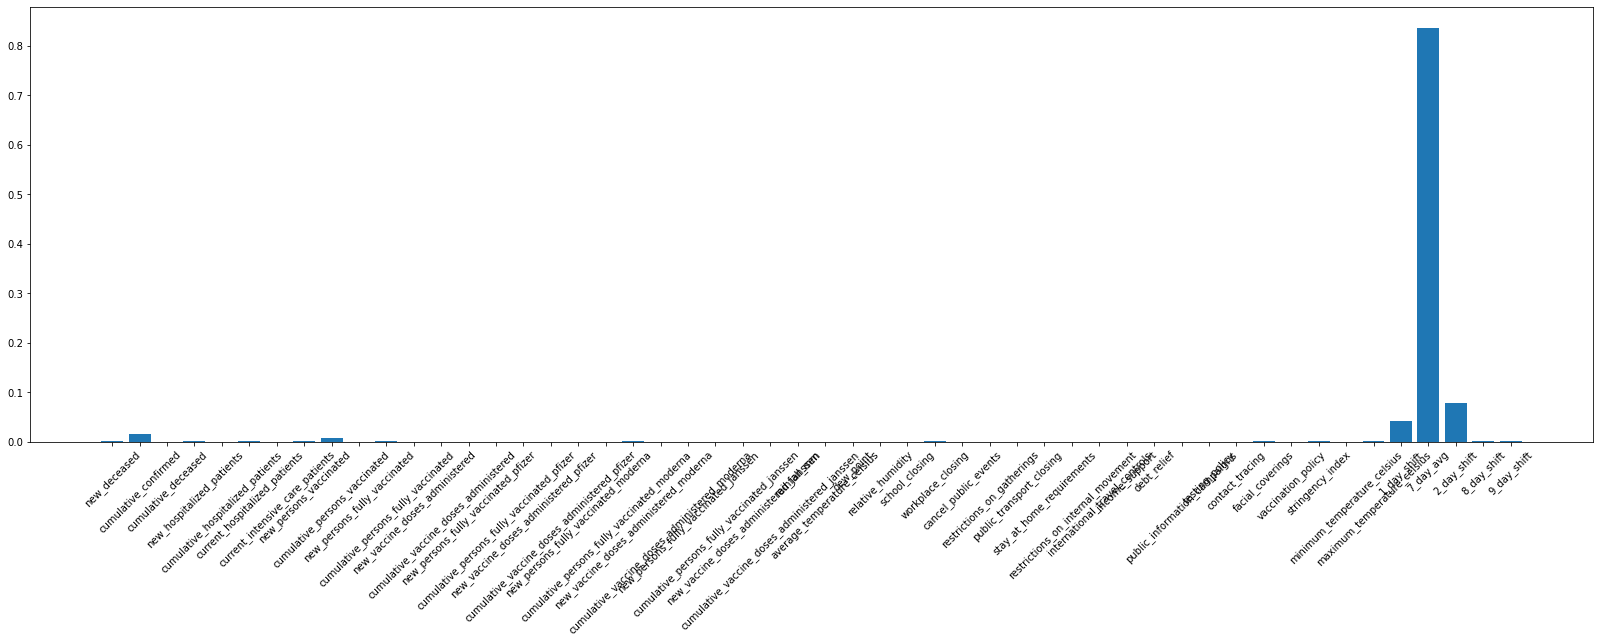

                           importance
7_day_shift                  0.595024
7_day_avg                    0.148570
cumulative_confirmed         0.049153
stay_at_home_requirements    0.035872
stringency_index             0.032358


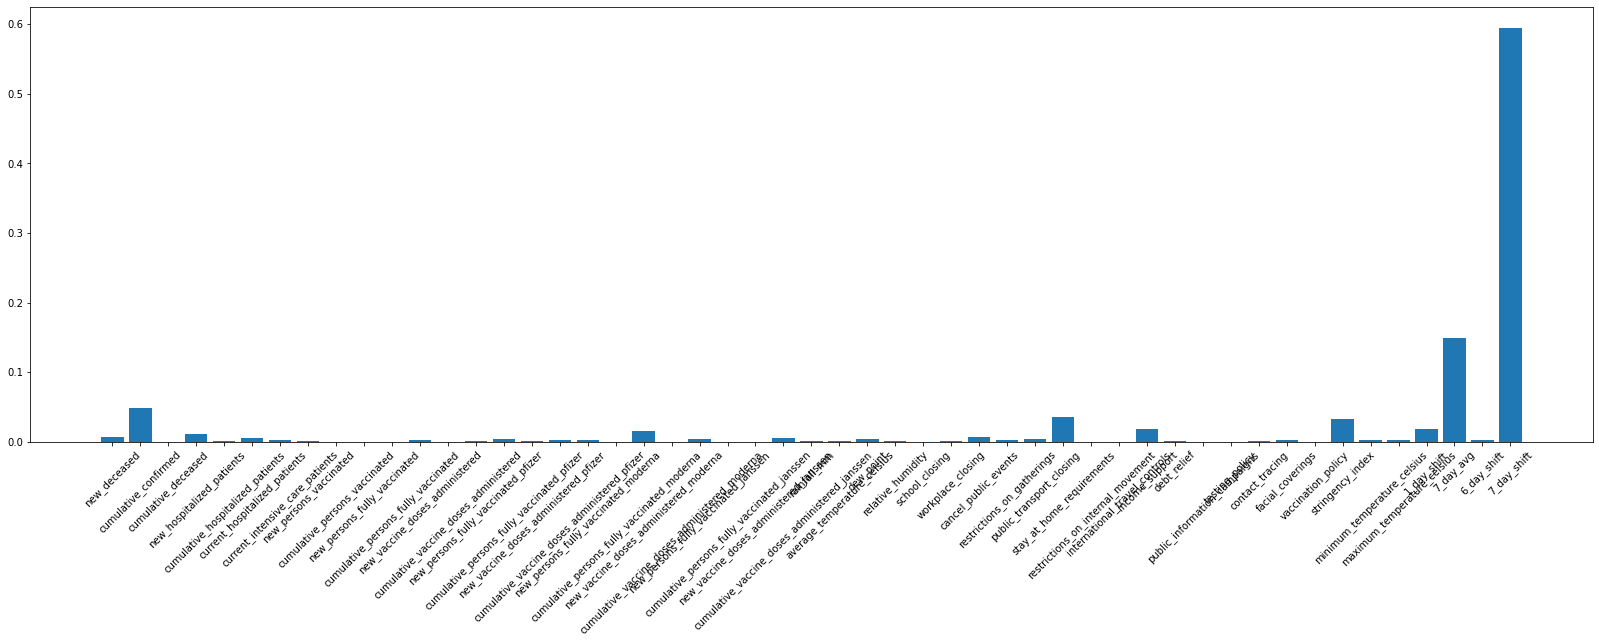

                                               importance
7_day_shift                                      0.613820
7_day_avg                                        0.080642
current_intensive_care_patients                  0.071699
workplace_closing                                0.069330
cumulative_vaccine_doses_administered_janssen    0.032191


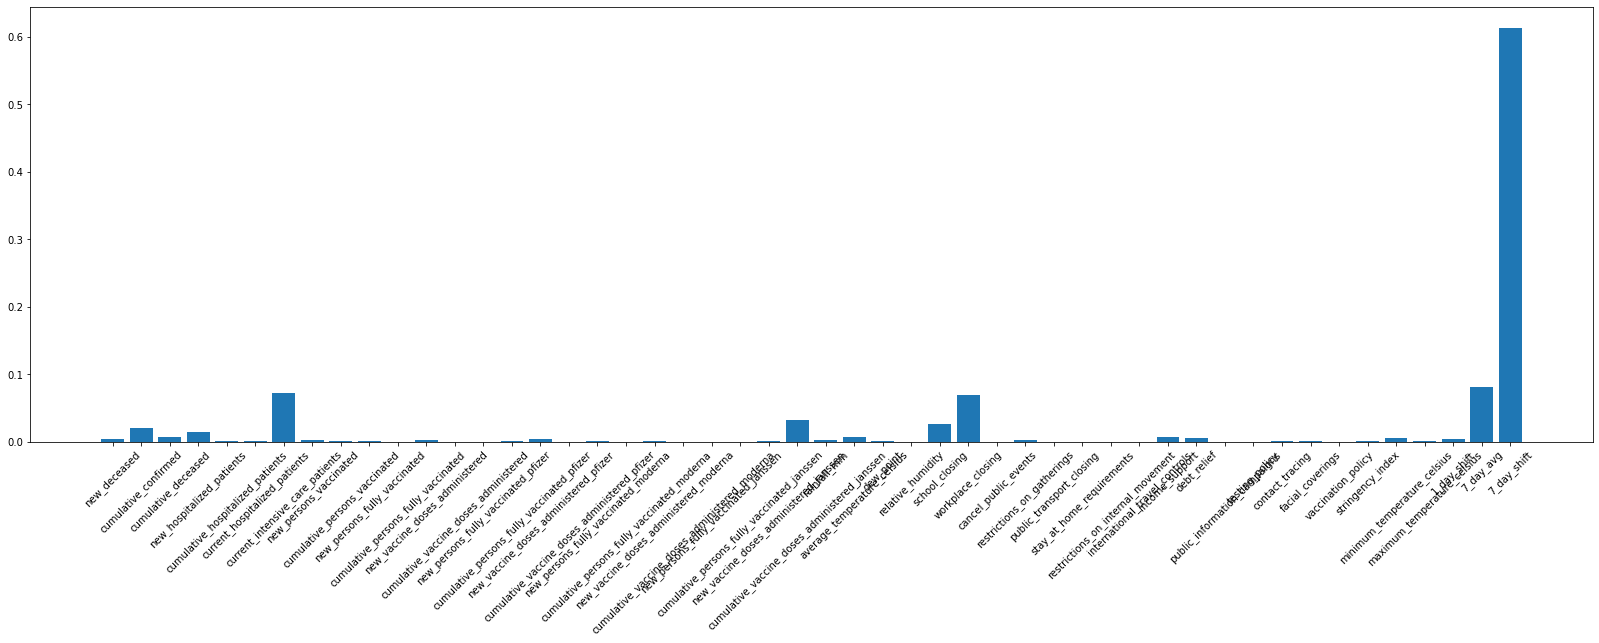

                                               importance
7_day_shift                                      0.573327
7_day_avg                                        0.148475
cumulative_vaccine_doses_administered_moderna    0.068308
cumulative_confirmed                             0.054985
3_day_shift                                      0.026683


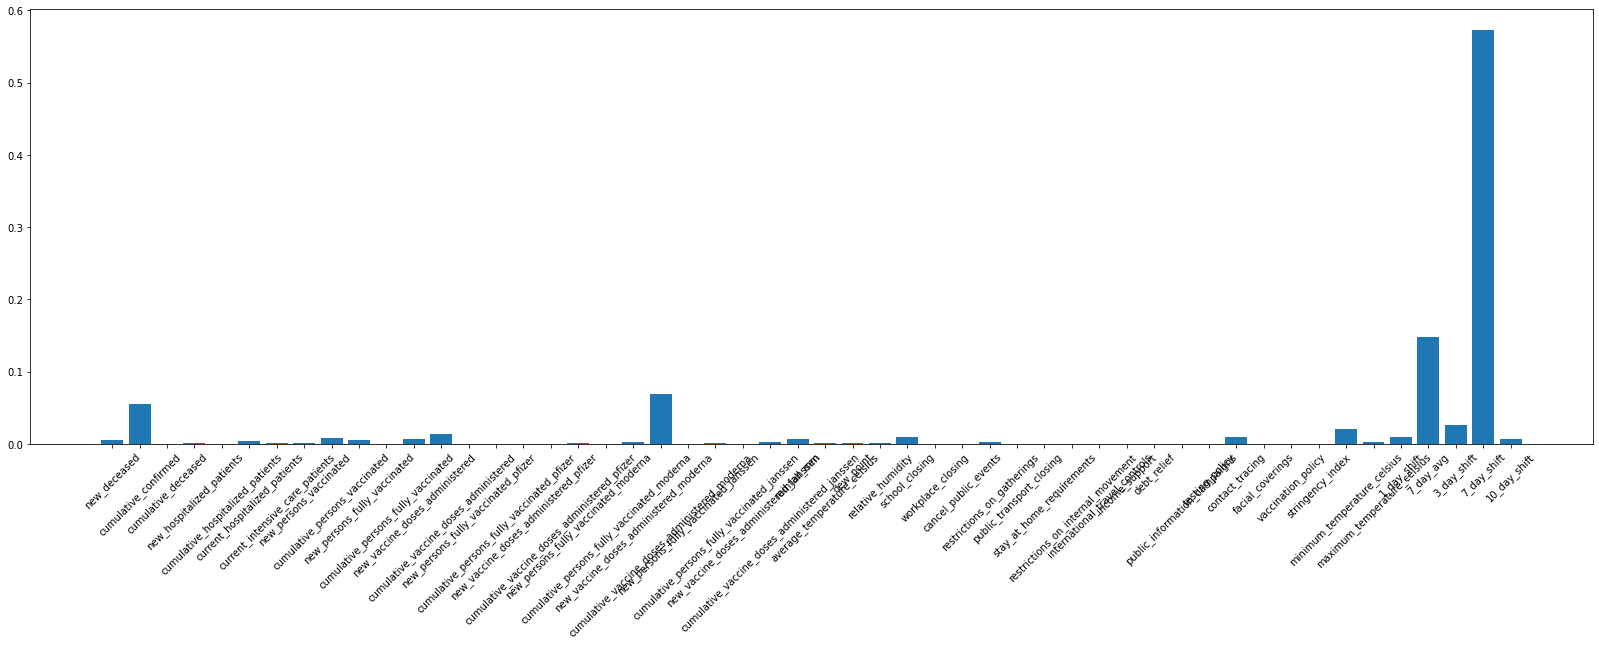

                           importance
7_day_shift                  0.625716
7_day_avg                    0.119969
new_hospitalized_patients    0.044694
stay_at_home_requirements    0.023409
income_support               0.019477


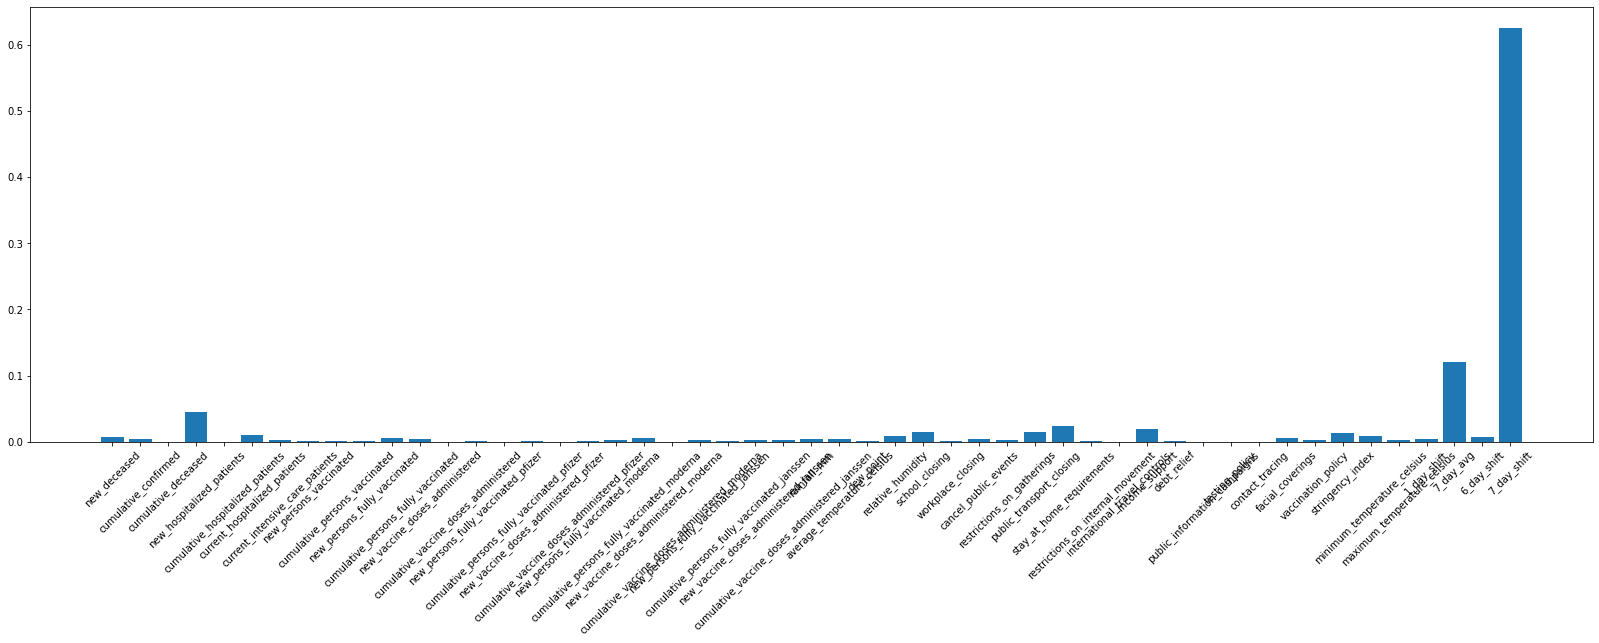

                               importance
7_day_avg                        0.335767
income_support                   0.297355
7_day_shift                      0.199055
public_transport_closing         0.032254
current_hospitalized_patients    0.022064


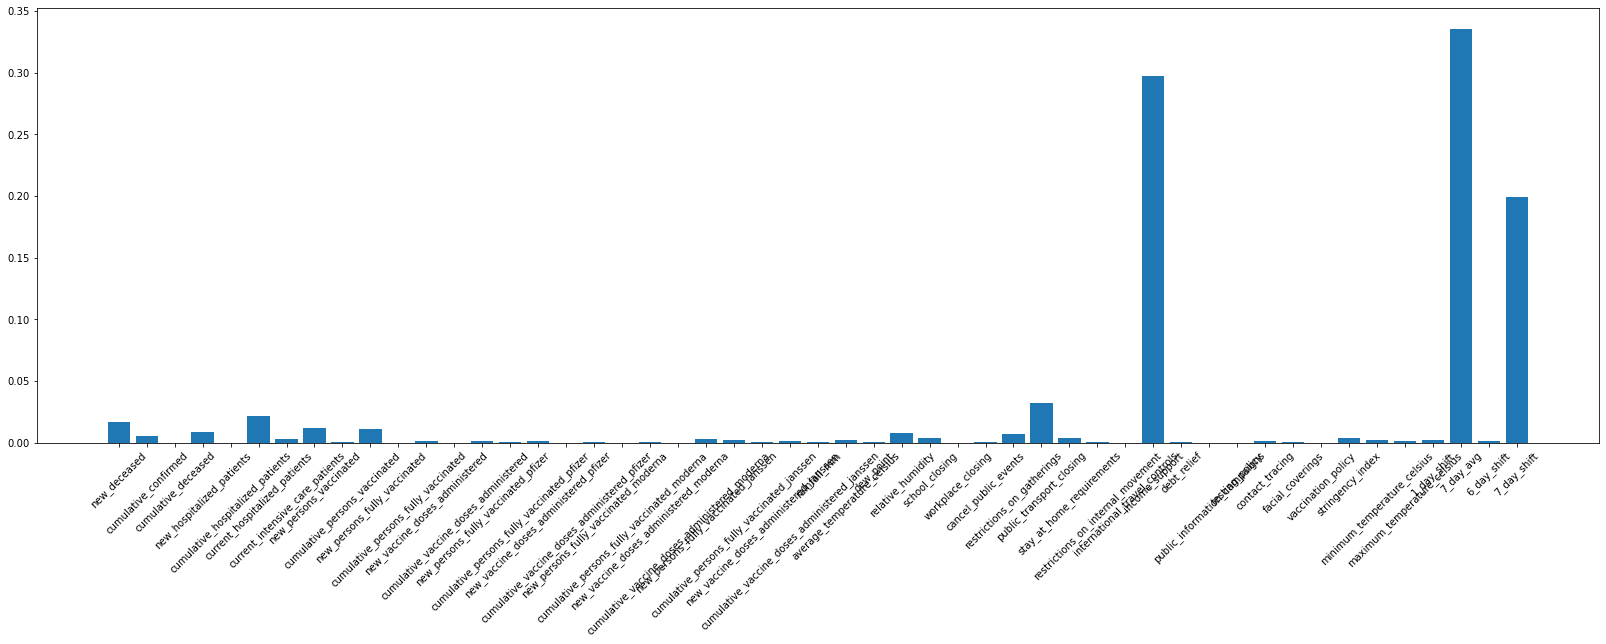

                                 importance
7_day_avg                          0.764583
7_day_shift                        0.066882
cumulative_confirmed               0.025315
facial_coverings                   0.015352
current_intensive_care_patients    0.014319


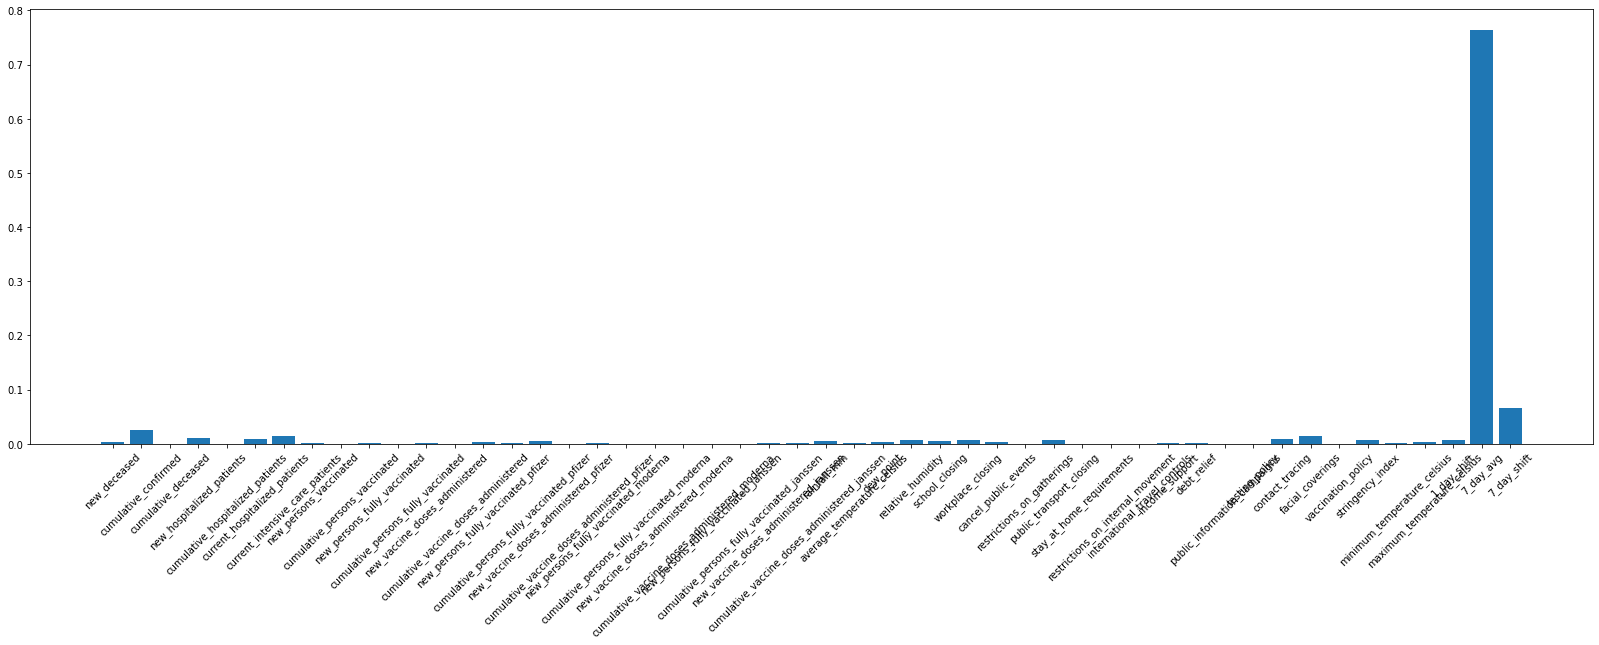

In [47]:
for df in datasets:
    calculate_feature_importance(df, target="new_confirmed")